A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [128]:
import pandas as pd
df = pd.read_csv("Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


## Punto 1

In [102]:
df.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

<AxesSubplot:>

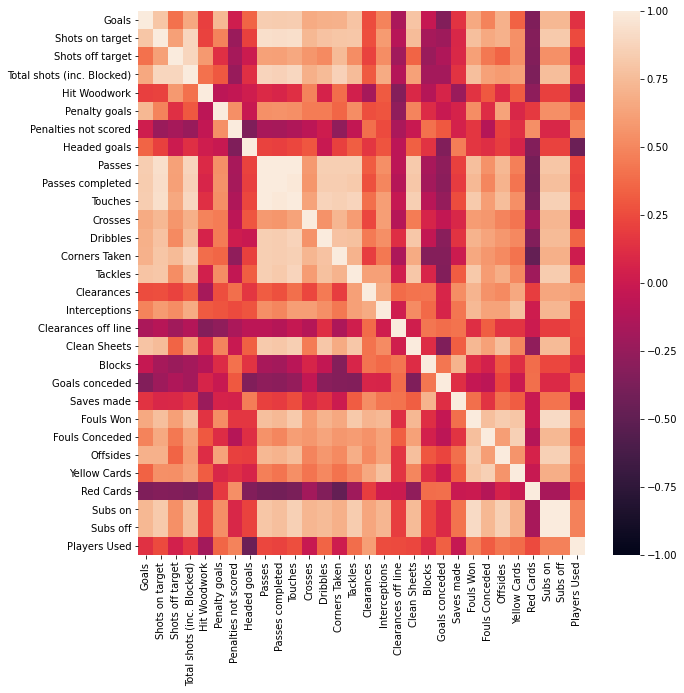

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1)

In [106]:
c = df.corr().abs()
for i in range(30):
    c.iat[i,i] = np.nan
c

,Goals,Shots on target,Shots off target,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,NaN,0.804193,0.403821,0.533239,0.650109,0.200512,0.730437,0.023094,0.349330,0.838497,...,0.337689,0.143912,0.663876,0.483833,0.703043,0.337709,3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,NaN,0.611185,0.049623,0.886090,0.212932,0.478610,0.229945,0.210571,0.930337,...,0.214415,0.085059,0.765949,0.658353,0.696263,0.544307,3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,NaN,0.389095,0.887032,0.581655,0.126783,0.173221,0.002284,0.624451,...,0.139274,0.086157,0.615058,0.434815,0.344626,0.534186,3.377661e-01,0.544974,0.544974,0.045973
% Goals-to-shots,0.533239,0.049623,0.389095,NaN,0.195113,0.087481,0.480954,0.370202,0.384424,0.114488,...,0.196602,0.121014,0.034561,0.014626,0.255441,0.071731,1.669397e-01,0.130146,0.130146,0.022179
Total shots (inc. Blocked),0.650109,0.886090,0.887032,0.195113,NaN,0.400121,0.299397,0.234668,0.125738,0.875698,...,0.184740,0.148269,0.766215,0.623288,0.589635,0.622268,3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,0.087481,0.400121,NaN,0.076923,0.041345,0.020174,0.095882,...,0.062541,0.230524,0.141180,0.303987,0.113657,0.319708,2.820513e-01,0.204511,0.204511,0.189466
Penalty goals,0.730437,0.478610,0.126783,0.480954,0.299397,0.076923,NaN,0.537484,0.020174,0.545294,...,0.020847,0.058761,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,0.229945,0.173221,0.370202,0.234668,0.041345,0.537484,NaN,0.357830,0.169613,...,0.302532,0.051019,0.163643,0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.384424,0.125738,0.020174,0.020174,0.357830,NaN,0.213073,...,0.344447,0.458773,0.157215,0.117445,0.188786,0.067245,3.429623e-01,0.216077,0.216077,0.447214
Passes,0.838497,0.930337,0.624451,0.114488,0.875698,0.095882,0.545294,0.169613,0.213073,NaN,...,0.284982,0.207240,0.773382,0.549248,0.731938,0.465799,4.002506e-01,0.800546,0.800546,0.232214


In [108]:
s = c.unstack()
so = s.sort_values(kind="quicksort")
so

Red Cards            Clearances off line    2.715272e-17
Clearances off line  Red Cards              2.715272e-17
Headed goals         Shots off target       2.284409e-03
Shots off target     Headed goals           2.284409e-03
Saves made           Corners Taken          2.432353e-03
                                                ...     
Offsides             Offsides                        NaN
Yellow Cards         Yellow Cards                    NaN
Red Cards            Red Cards                       NaN
Subs on              Subs on                         NaN
Subs off             Subs off                        NaN
Length: 961, dtype: float64

In [110]:
#Cojo 1 de cada 2 ya que las correlaciones en la tabla se repiten 1 vez todas
se = so[:-30:2]
se.tail(4)
#Estos son las columnas de datos de mayor correlación

Passes            Touches         0.993044
Passes completed  Passes          0.997697
Subs off          Subs on         1.000000
Players Used      Players Used    1.000000
dtype: float64

## Punto 2


#### Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre Goals y Shooting Accuracy

In [112]:
X = df["Shooting Accuracy"].str[:-1].astype(float).values
X = X.reshape(-1, 1)
X.shape

(16, 1)

In [114]:
y = df["Goals"].values
y.shape

(16,)

In [116]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
#Resgresión linear
lm = LinearRegression()

In [118]:
lm.fit(X_train, y_train)

LinearRegression()

In [119]:
#Con el coeficiente se obtiene la pendiente de la recta de predicción. Esto nos dice que cada punto porcentual de Shooting Accuracy.
lm.coef_

array([0.17981619])

Text(0, 0.5, 'Goals')

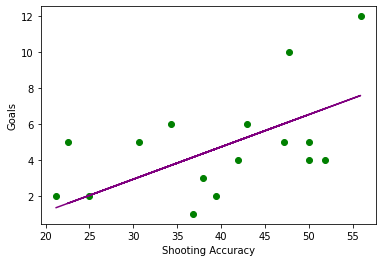

In [120]:
#Para este caso, la regresión lineal no es buena porque los puntos que se muestran presentan un gran margen de error en cuanto a la predicción postulada.
plt.scatter(X, y, color = "green")
plt.plot(X, lm.predict(X), color="purple")
plt.xlabel("Shooting Accuracy")
plt.ylabel("Goals")

Score con "2" grados de Shooting accuracy para Goals: 42.64994690183682 



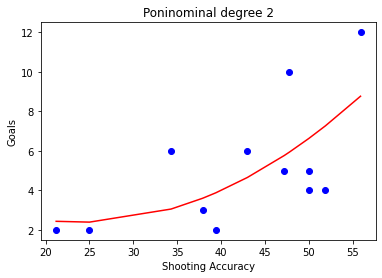



Score con "3" grados de Shooting accuracy para Goals: 49.88958046596549 



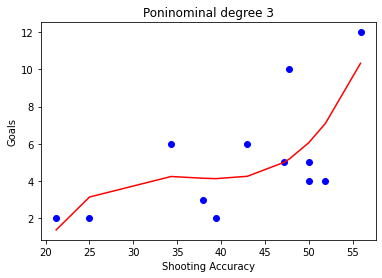



Score con "4" grados de Shooting accuracy para Goals: 53.19122671992348 



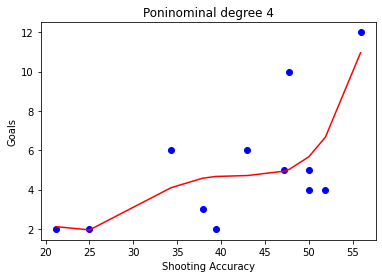



Score con "5" grados de Shooting accuracy para Goals: 57.893249428417384 



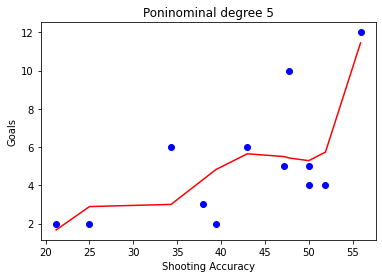



Score con "6" grados de Shooting accuracy para Goals: 83.74670277358918 



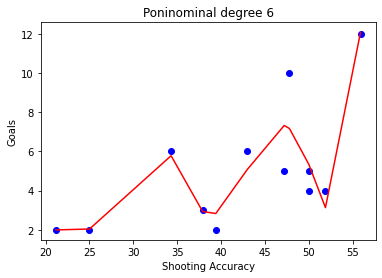



Score con "7" grados de Shooting accuracy para Goals: 82.56952458743979 



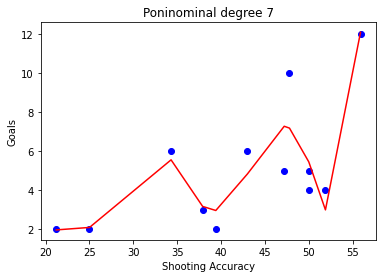



Score con "8" grados de Shooting accuracy para Goals: 85.07832430034365 



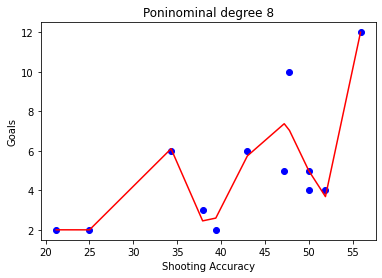



Score con "9" grados de Shooting accuracy para Goals: 85.23345526905095 



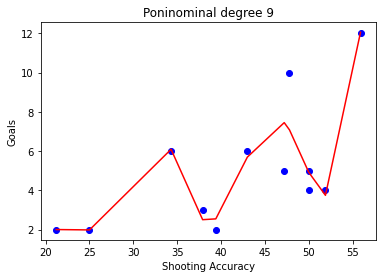



Score con "10" grados de Shooting accuracy para Goals: 85.35607303747732 



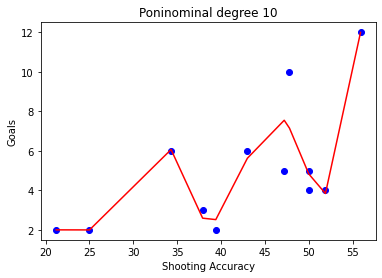



Score con "11" grados de Shooting accuracy para Goals: 85.36966364454906 



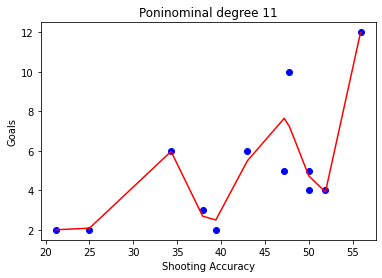



Score con "12" grados de Shooting accuracy para Goals: 76.30087540934676 



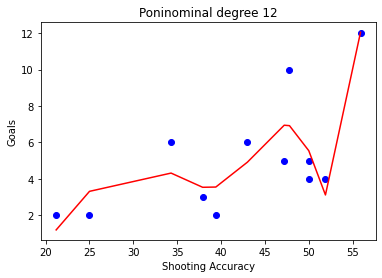



Score con "13" grados de Shooting accuracy para Goals: 77.5664760429174 



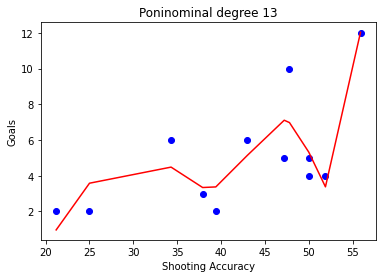



Score con "14" grados de Shooting accuracy para Goals: 79.73788820322292 



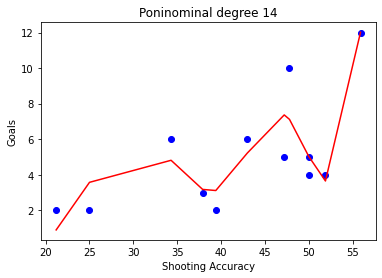



Score con "15" grados de Shooting accuracy para Goals: 81.6445186854253 



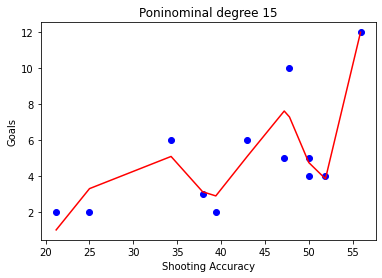



Score con "16" grados de Shooting accuracy para Goals: 82.53016503496329 



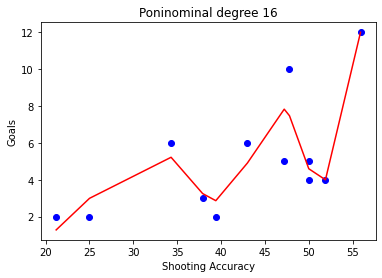



Score con "17" grados de Shooting accuracy para Goals: 82.39887397677099 



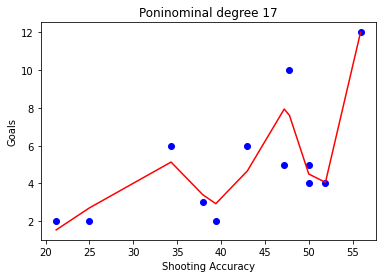



Score con "18" grados de Shooting accuracy para Goals: 81.58140648000175 



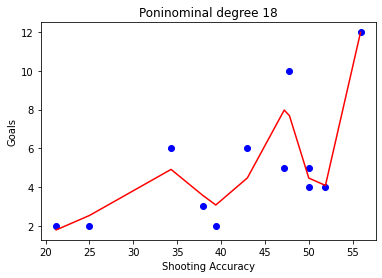



Score con "19" grados de Shooting accuracy para Goals: 80.41093020924698 



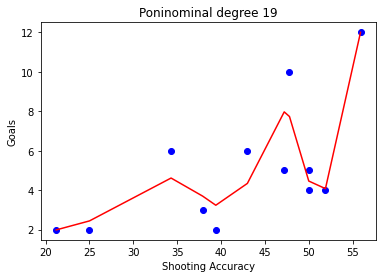

In [126]:
#Regresión no Lineal con polinomio
tabla_score = []
tabla_x = []
for degree in range(2,20):
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)
    lm.fit(X_poly, y_train)
        

    y_pred = lm.predict(X_poly)
    tabla_score.append(r2_score(y_train, y_pred)*100)
    tabla_x.append(degree)
    print (f'Score con "{degree}" grados de Shooting accuracy para Goals:', r2_score(y_train, y_pred)*100, "\n")

    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.xlabel("Shooting Accuracy")
    plt.ylabel("Goals")
    plt.show()
    print("\n")

In [122]:
#Buen algoritmo para utilizar. Muy buenos scores



score: 9.643740493314256




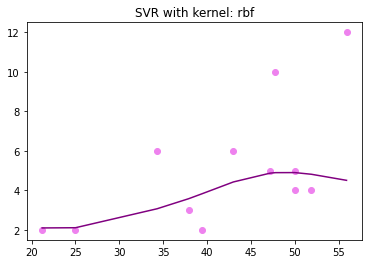



score: 24.13496689952663
Aumento de Goals para cada punto porcentual en Shooting accuracy: [[0.11110652]]




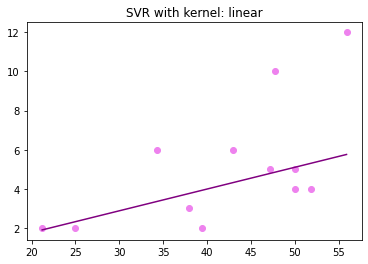



score: 34.485653615262244




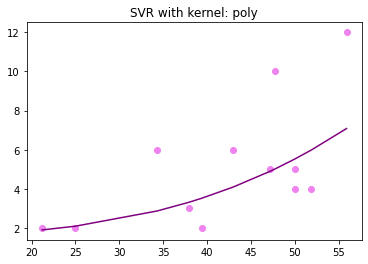

In [123]:
#SVR
kernel = ['rbf', 'linear', 'poly']
dicti_svr_scores = {"column":[], "kernel":[], "score":[]}

for ker in kernel:
    print("\n")
    model = SVR(kernel=ker)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    score = r2_score(y_train, y_pred)*100
    print("score:", score)
    if ker == "linear":
        print("Aumento de Goals para cada punto porcentual en Shooting accuracy:", model.coef_)

    lista_val = [X, ker, score]
    for i,e in enumerate(["column", "kernel", "score"]):
        dicti_svr_scores[e].append(lista_val[i])
    print("\n")    
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='violet')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='purple')
    plt.title("SVR with kernel: " + str(ker))
    plt.show()

In [124]:
#SVR da scores muy bajos, no es un algoritmo útil para este ejercicio.

## Punto 3
#### Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

#### % de goles por disparo: 40%
#### Total shots (inc. Blocked): 102
#### Corners Taken: 5
#### Passes: 82
#### Dribbles: 23

In [129]:
df["% Goals-to-shots"] = df["% Goals-to-shots"].str[:-1].astype(float).values


In [130]:
search = [40, 102, 5, 82, 23]
df.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [131]:
#Logistic regression, SVM, random forest
X = df[["% Goals-to-shots", "Total shots (inc. Blocked)", "Corners Taken", "Passes", "Dribbles"]].values
X

array([[1.600e+01, 3.200e+01, 1.400e+01, 1.076e+03, 4.200e+01],
       [1.290e+01, 3.900e+01, 2.100e+01, 1.565e+03, 6.800e+01],
       [2.000e+01, 2.700e+01, 1.600e+01, 1.298e+03, 3.200e+01],
       [1.720e+01, 4.000e+01, 1.600e+01, 1.488e+03, 6.000e+01],
       [6.500e+00, 6.500e+01, 2.800e+01, 2.066e+03, 7.600e+01],
       [1.560e+01, 8.000e+01, 3.500e+01, 2.774e+03, 6.000e+01],
       [1.920e+01, 3.200e+01, 1.000e+01, 1.187e+03, 5.300e+01],
       [7.500e+00, 1.100e+02, 3.000e+01, 3.016e+03, 7.500e+01],
       [4.100e+00, 6.000e+01, 2.200e+01, 1.556e+03, 4.900e+01],
       [5.200e+00, 4.800e+01, 1.400e+01, 1.059e+03, 3.900e+01],
       [9.300e+00, 8.200e+01, 4.100e+01, 1.891e+03, 6.400e+01],
       [5.200e+00, 2.800e+01, 8.000e+00, 8.510e+02, 1.800e+01],
       [1.250e+01, 5.900e+01, 2.100e+01, 1.602e+03, 4.000e+01],
       [1.600e+01, 1.000e+02, 4.400e+01, 4.317e+03, 1.060e+02],
       [1.380e+01, 3.900e+01, 7.000e+00, 1.192e+03, 2.900e+01],
       [6.000e+00, 3.800e+01, 1.800e+01,

In [132]:
y = df["Goals"]
y

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [133]:
logic = LogisticRegression(max_iter=100)
logic.fit(X,y)


C:\Users\Adrià\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [136]:
#No es mal score
logic.score(X, y)*100

75.0

In [142]:
predicted_1 = logic.predict([search])
print("Goles según los datos aportados:", predicted_1)


Goles según los datos aportados: [6]


In [ ]:
#SVC

In [151]:
model_svc = SVC(kernel= "rbf", C = 100, gamma = 0.1, random_state = 100) 
model_svc.fit(X, y)

SVC(C=100, gamma=0.1, random_state=100)

In [160]:
y_pred_svc = model_svc.predict(X)

In [163]:
score_svc = accuracy_score(y, y_pred_svc)

print("Predicción de Goals:", model_svc.predict([search]))
print("score:", score_svc)

Predicción de Goals: [5]
score: 1.0


In [ ]:
#SVC de SVM da un score perfecto. Es el mejor algoritmo que se puede utilizar para esta prueba.

In [165]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X, y)
predictions = rf.predict(X)

In [167]:
errors = abs(predictions - y)
mape = 100 * (errors / y)
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.85 %.


In [ ]:
#Random forest también es un algoritmo adecuado para este ejercicio